In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [2]:
k = 0.157 # from lindhard
q = 1.602*10**-19 #electron charge 
V = 4.0 # voltage Bias
eps = .0033 #keV

#for detector 1.

p_alpha = 0.155393
p_beta = 9.60343*10**(-11)
p_gamma = 0.000506287

q_alpha = 0.166004
q_beta = 0.00233716
q_gamma = 9.52576*10**(-5)

In [3]:
#x = np.arange(0,200,0.002)
#Er = 93*np.exp(-x/29) #For NR from Kennedy Thesis 

N = 100000
#Er = np.random.exponential(40,np.uint32(N*0.3)) #tip from anthony 
#Er = np.arange(0,200,0.002)
Er = np.random.uniform(0,200,N)
#need to store all of this inorder to calculate fano factor.
ER = []
Yield = []
PtNr = []
QR = []
sigQ = []
sigP = []
sigQ1 = []
sigP1 = []
Err=[]

U1 = []
U2 = []
N_eh = []

QNR=[]
PT1 = []
FQ = []


In [4]:
#For Nuclear Recoils 
F =100



Enr = 40
    
Err.append(Enr)

esp = 11.5*Enr*(23)**-(7/3)
g = 3*esp**(0.15)+0.7*esp**(0.6)+esp
Y = k*g/(1+k*g)
    
#number of electron-hole pairs. 
Ptnr = (Y*Enr*V)/(eps*1000) + Enr #central value of Pt
Qnr = Y*Enr
    
for i in np.arange(0,N):
    
    Neh = Y*Enr/eps
    N_eh.append(Neh)
    
    sig_p1 = np.sqrt(p_alpha + p_beta*Ptnr + p_gamma*(Ptnr**2) )  
    sig_q1 = np.sqrt(q_alpha + q_beta*Qnr + q_gamma*(Qnr**2) )
    
   #With Fano Factor. 
    sig_p = np.sqrt(p_alpha + p_beta*Ptnr + p_gamma*(Ptnr**2) + (V/1000)**2*Neh*F)  #Phonon uncertainty (energy dependent)
    sig_q = np.sqrt(q_alpha + q_beta*Qnr + q_gamma*(Qnr**2) + F*N*eps**2) #Charge uncertainty 
    

    
    sigQ.append(sig_q)
    sigP.append(sig_p)
    sigQ1.append(sig_q1)
    sigP1.append(sig_p1)
    
    
    Fnr = np.random.normal(0.0,sig_p)#random sample assuming phonon variance 

    Fq = np.random.normal(0.0,sig_q) #random sampel assuming charge variance 
    
    FQ.append(Fq)
    #Ptnr = (Y*Enr*V)/eps + Enr #total phonon energy 
    Ptnr1 = Ptnr + Fnr #not central value! just.. smeared 
    PT1.append(Ptnr1)

    Qnr1 = Qnr + Fq 

    QNR.append(Qnr1)
    
    U_1 = 1/Enr #Ptnr/(Ptnr-Qnr1*(V/(eps*1000)))**2 #derivative with respect to Qnr1
    U1.append(U_1)
    U_2 = 0 #-Qnr1/(Ptnr1 -(Qnr1*V/(eps*1000)))**2      #derivative with respect to Ptnf
    U2.append(U_2)
    
    Ernr = Ptnr1 - (V/(eps*1000))*Qnr1
    ER.append(Ernr)

    yield1 = Qnr1 / Enr
    Yield.append(yield1)



In [5]:
data = np.vstack((ER,Yield,sigQ1,sigP1,U1,U2,N_eh)).T


x = data[data[:,1]>=0, :]

data1 = x[x[:,1]<=1.6,:]

data2 = data1[data1[:,0]>=0,:]
#data2 = data1

data1 = data2[np.argsort(data2[:, 0])]

A = np.array_split(data1,10)

print(np.shape(A))
print(len(A))

(10, 8973, 7)
10


In [15]:

val_stat = []
val = []
Sy = []
amax = 30
for data in A:
    U1 = data[:,4]
    U2 = data[:,5]
    sigQ = data[:,2]
    sigP = data[:,3]
    N = data[:,6]
    sigy = np.std(data[:,1])
    #sigy = np.std(Yield)
   
    #Fano = (-U1**2*sigQ**2-U2**2*sigP**2 + sigy**2)/(U1**2*eps**2 +U2**2*(V/1000)**2)
    #Fano = Fano/N
    Fano = (sigy**2*Enr**2 - sigQ**2)/(eps**2*N)
    #val_stat.append(Fano) 
    val_stat = Fano
    #print(val_stat)
    val.append(Fano)
print((val))
print(len(sigQ))
print(len(val_stat))   
print(len(Fano))


[array([440.36757787, 440.36757787, 440.36757787, ..., 440.36757787,
       440.36757787, 440.36757787]), array([152.04179898, 152.04179898, 152.04179898, ..., 152.04179898,
       152.04179898, 152.04179898]), array([130.85273663, 130.85273663, 130.85273663, ..., 130.85273663,
       130.85273663, 130.85273663]), array([124.69182406, 124.69182406, 124.69182406, ..., 124.69182406,
       124.69182406, 124.69182406]), array([125.17901764, 125.17901764, 125.17901764, ..., 125.17901764,
       125.17901764, 125.17901764]), array([125.45558067, 125.45558067, 125.45558067, ..., 125.45558067,
       125.45558067, 125.45558067]), array([126.68210043, 126.68210043, 126.68210043, ..., 126.68210043,
       126.68210043, 126.68210043]), array([126.9793711, 126.9793711, 126.9793711, ..., 126.9793711,
       126.9793711, 126.9793711]), array([128.05560375, 128.05560375, 128.05560375, ..., 128.05560375,
       128.05560375, 128.05560375]), array([87.1905743, 87.1905743, 87.1905743, ..., 87.1905743, 

In [7]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
#plt.style.use('standard')

-0.7457811370511991 1.4925122806142812


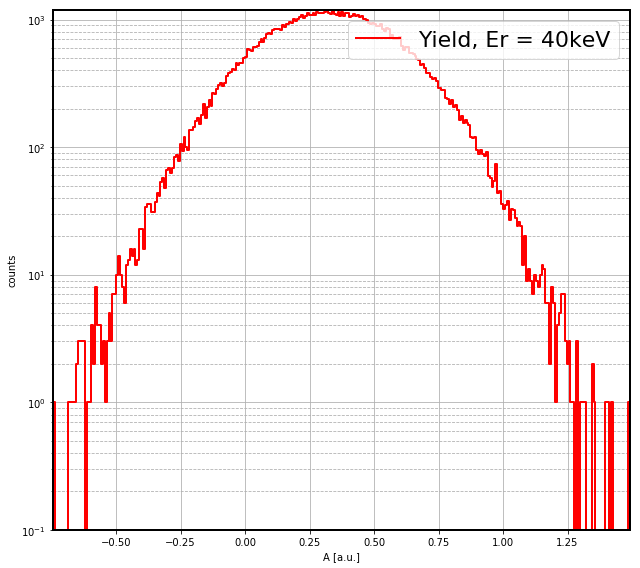

In [8]:
xmin=min(Yield)
xmax=max(Yield)

#print(np.std(val_stat))
print(xmin,xmax)

n_res,n_resx = np.histogram(Yield,300,range=(xmin,xmax))


xresc = (n_resx[:-1] + n_resx[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(-amax,amax,0.01)

step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label='Yield, Er = 40keV', linewidth=2)



ymin=0.1
ymax=max(n_res)


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

87.1905743004151 87.1905743004151


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=87.1905743004151, right=87.1905743004151
  'left=%s, right=%s') % (left, right))


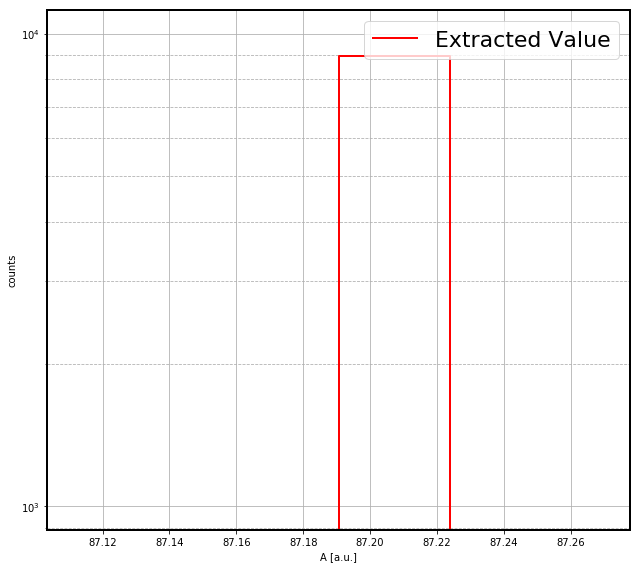

In [9]:
xmin=np.amin(val_stat)
xmax=np.amax(val_stat)

#xmin = 0
#xmax = 120

#print(np.std(val_stat))
print(xmin,xmax)

n_res,n_resx = np.histogram(val_stat,30,range=(xmin,xmax))


xresc = (n_resx[:-1] + n_resx[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(-amax,amax,0.01)

step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label='Extracted Value', linewidth=2)



ymin=0.1
ymax=max(n_res)


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
#ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()